# ER-Deceleration Curve

---

# 1 ER-Decel Curve

The ER-deceleration curve is generated from literature with laboratory measuremnt results. We update the dataset via meta-analysis based on the framework of MOVES. All curve parameters and literature are stored in the `BWETool` class which provides toolkits for:  
1. Braking detection;
2. OpMode recognition;
3. ER calculation.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [2]:
# initialize a BWETool object
from emission import BWETool
BWE = BWETool()

In [3]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import numpy as np

def fit_ER_decel_curve(data):

    def func(x, a, b):
        return a * (x ** b)
    
    xdata = data['Decel[m/s2]']
    ydata = data['PM10ER[g/hr/brake]']
    params, cov = curve_fit(func, xdata, ydata)
    score = r2_score(ydata, func(xdata, params[0], params[1]))
    
    return params, score

## 1.1 Low Metallic

In [4]:
BWE.ER.LM_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr/brake],"Author, Year"
0,LM,0.97,0.846861,"Liu et al., 2022"
1,LM,1.07,0.496698,"Farwick Zum Hagen et al., 2019"
2,LM,1.07,1.171698,"Farwick Zum Hagen et al., 2019"
3,LM,1.20,1.840000,"Sanders et al., 2003"
4,LM,1.20,1.866667,"Sanders et al., 2003"
5,LM,2.84,29.413854,"Perricone et al., 2018"
6,LM,2.84,10.550622,"Perricone et al., 2018"
7,LM,2.84,21.420959,"Perricone et al., 2018"
8,LM,7.90,822.857143,"Sanders et al., 2003"


In [5]:
# params_LM, score_LM = fit_ER_decel_curve(BWE.ER.LM_PM10_ERs)
# np.save('./emission/emission-data/LM_PM10_pow_param.npy', params_LM)
# np.save('./emission/emission-data/LM_PM10_pow_score.npy', score_LM)

In [6]:
BWE.ER.LM_POW_PARAM

array([0.4751835 , 3.60780318])

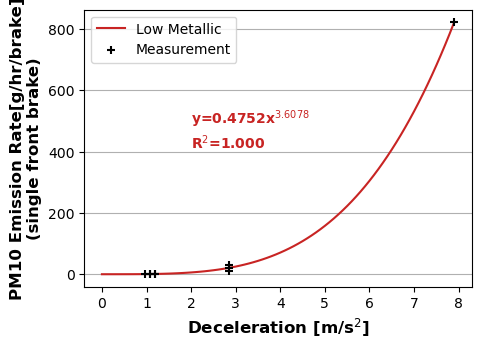

In [7]:
BWE.ER.plotERCurve("LM")

## 1.2 NAO

In [8]:
BWE.ER.NAO_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr/brake],"Author, Year"
9,NAO,0.30,0.011218,"Woo et al., 2021"
10,NAO,0.82,0.020690,"Woo et al., 2021"
11,NAO,0.97,0.029035,"Woo et al., 2021"
12,NAO,1.07,0.065972,"Woo et al., 2021"
13,NAO,0.97,0.887188,"Grigoratos et al., 2023"
14,NAO,0.97,1.572742,"Storch et al., 2023"
15,NAO,1.00,0.057629,"Iijima et al., 2008"
16,NAO,1.20,0.900000,"Sanders et al., 2003"
17,NAO,1.20,0.400000,"Sanders et al., 2003"
18,NAO,2.57,0.083029,"Woo et al., 2021"


In [9]:
# params_NAO, score_NAO = fit_ER_decel_curve(BWE.ER.NAO_PM10_ERs)
# np.save('./emission/emission-data/NAO_PM10_pow_param.npy', params_NAO)
# np.save('./emission/emission-data/NAO_PM10_pow_score.npy', score_NAO)

In [10]:
BWE.ER.NAO_POW_PARAM

array([4.77674161e-03, 5.65208564e+00])

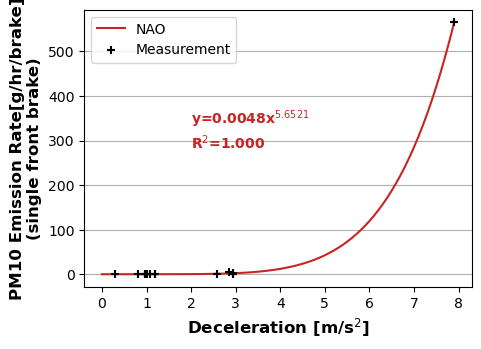

In [11]:
BWE.ER.plotERCurve("NAO")

## 1.3 Semi-metallic

In [12]:
BWE.ER.SM_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr/brake],"Author, Year"
24,SM,1.20,0.453333,"Sanders et al., 2003"
25,SM,2.94,1.417021,"Garg et al., 2000"
26,SM,2.94,0.628085,"Garg et al., 2000"
27,SM,7.90,524.571429,"Sanders et al., 2003"


In [13]:
# params_SM, score_SM = fit_ER_decel_curve(BWE.ER.SM_PM10_ERs)
# np.save('./emission/emission-data/SM_PM10_pow_param.npy', params_SM)
# np.save('./emission/emission-data/SM_PM10_pow_score.npy', score_SM)

In [14]:
BWE.ER.SM_POW_PARAM

array([1.13307144e-03, 6.31169379e+00])

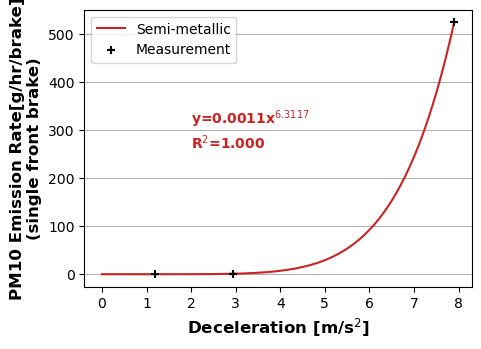

In [15]:
BWE.ER.plotERCurve("SM")

### 1.4 Mix & adjust

In [16]:
fr_ratio = 2  # brake force on front axle vs rear axle
drum_ratio = 0.3  # ratio of drum emissions to disc emissions 
prop_NAO_f = 0.7974
prop_LM_f = 0.1775
prop_SM_f = 0.0251
prop_NAO_r = 0.8186
prop_LM_r = 0.1755
prop_SM_r = 0.0058

In [17]:
def vehER(
    decel,
    prop_NAO_f = 0.7974,
    prop_LM_f = 0.1775,
    prop_SM_f = 0.0251,
    prop_NAO_r = 0.8186,
    prop_LM_r = 0.1755,
    prop_SM_r = 0.0058,
    prop_drum_f = 0,
    prop_drum_r = 0.2228,
    r_f_ratio = 0.5,  # brake force on front axle vs rear axle
    drum_disc_ratio = 0.3, # ratio of drum emissions to disc emissions 
):
    def pow(x, a, b):
        return a * np.power(x, b)
    
    # mix for disc brake
    ER_f_disc = (pow(decel, *BWE.ER.NAO_POW_PARAM) * prop_NAO_f) \
              + (pow(decel, *BWE.ER.LM_POW_PARAM) * prop_LM_f) \
              + (pow(decel, *BWE.ER.SM_POW_PARAM) * prop_SM_f)
    ER_r_disc = (pow(decel, *BWE.ER.NAO_POW_PARAM) * prop_NAO_r) \
              + (pow(decel, *BWE.ER.LM_POW_PARAM) * prop_LM_r) \
              + (pow(decel, *BWE.ER.SM_POW_PARAM) * prop_SM_r)
    ER_r_disc *= r_f_ratio
    
    # adjust for axles
    ER_f_drum = ER_f_disc * drum_disc_ratio
    ER_r_drum = ER_r_disc * drum_disc_ratio

    # mix for veh
    ER = (1 - prop_drum_f) * ER_f_disc \
        + prop_drum_f * ER_f_drum \
        + (1 - prop_drum_r) * ER_r_disc \
        + prop_drum_r * ER_r_drum
    
    return ER * 2

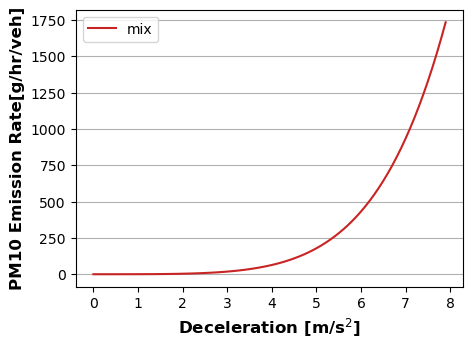

In [18]:
BWE.ER.plotERCurve('mix')

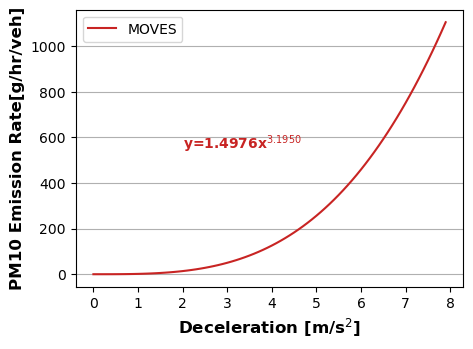

In [19]:
BWE.ER.plotERCurve('MOVES')

# 2 Comparison with MOVES

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# font
plt.rcParams['font.sans-serif'] = ['Arial']
LABEL_FONT = {
    "fontsize": 12,
    "weight": "bold",
}    

# colors
BLUE = '#2878B5'
LIGHTBLUE = '#9AC9DB'
ORANGE = '#F8AC8C'
RED = '#C82423'
PINK = '#FF8884'
GREY = '#9E9E9E'
DEEPGREEN = '#32B897'
GREEN = '#96CCCB'

# initialize a BWETool object
from emission import BWETool
BWE = BWETool()

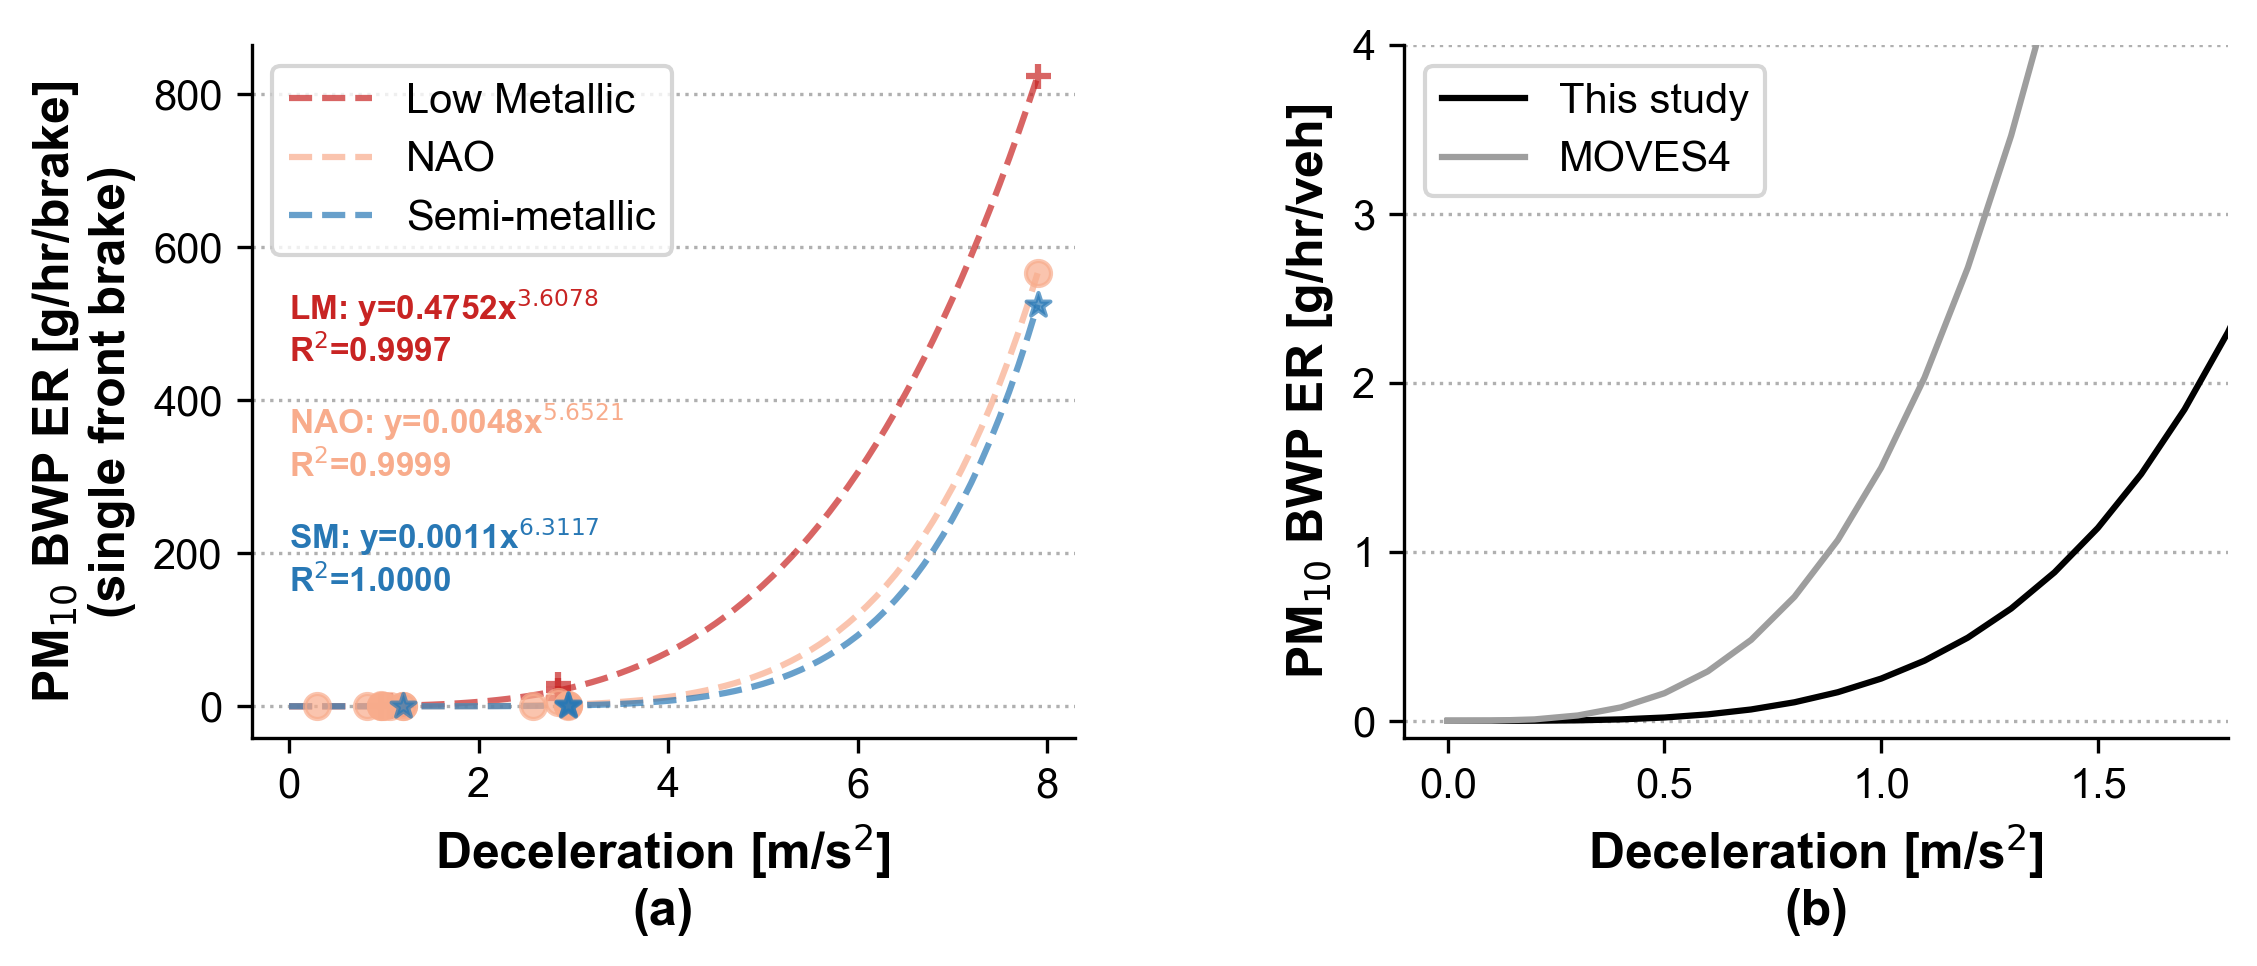

In [7]:
# comparison
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(1, 2, figsize=(8.5,3))

decel = np.arange(0, 8, 0.1)
alpha = 0.7
LM_color, NAO_color, SM_color = RED, ORANGE, BLUE

# Low-M
pred_pow = BWE.ER.calER(decel, "LM")
ax[0].plot(decel, pred_pow, color=LM_color, linestyle='--', label="Low Metallic", alpha=alpha, zorder=10)
ax[0].scatter(BWE.ER.LM_PM10_ERs['Decel[m/s2]'], BWE.ER.LM_PM10_ERs['PM10ER[g/hr/brake]'], color=LM_color, marker="+", alpha=alpha, zorder=20)

# NAO
pred_pow = BWE.ER.calER(decel, "NAO")
ax[0].plot(decel, pred_pow, color=NAO_color, linestyle='--', alpha=alpha, label="NAO", zorder=10)
ax[0].scatter(BWE.ER.NAO_PM10_ERs['Decel[m/s2]'], BWE.ER.NAO_PM10_ERs['PM10ER[g/hr/brake]'], color=NAO_color, marker="o", alpha=alpha, zorder=20)

# Semi-M
pred_pow = BWE.ER.calER(decel, "SM")
ax[0].plot(decel, pred_pow, color=SM_color, linestyle='--', alpha=alpha, label="Semi-metallic", zorder=10)
ax[0].scatter(BWE.ER.SM_PM10_ERs['Decel[m/s2]'], BWE.ER.SM_PM10_ERs['PM10ER[g/hr/brake]'], color=SM_color, marker="*", alpha=alpha, zorder=20)

# mix
pred_pow = BWE.ER.calER(decel, 'mix')
ax[1].plot(decel, pred_pow, color='k', label="This study", zorder=10)

# MOVES
pred_pow = BWE.ER.calER(decel, "MOVES")
ax[1].plot(decel, pred_pow, color=GREY, label="MOVES4", zorder=10)

# axis label
ax[0].set_xlabel("Deceleration [m/s$^2$]\n(a)", fontdict=LABEL_FONT)
ax[0].set_ylabel("PM$_{10}$ BWP ER [g/hr/brake]\n(single front brake)", fontdict=LABEL_FONT)
ax[0].grid(axis='y', linestyle=':', zorder=0)
ax[0].legend()
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# zoom in
ax[1].set_xlim(-0.1,1.8)
ax[1].set_ylim(-0.1,4)
ax[1].grid(axis='y', linestyle=':', zorder=0)
ax[1].legend()
ax[1].set_xlabel("Deceleration [m/s$^2$]\n(b)", fontdict=LABEL_FONT)
ax[1].set_ylabel("PM$_{10}$ BWP ER [g/hr/veh]", fontdict=LABEL_FONT)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# #text
text_x, text_y, interval = 0, 450, 150
ax[0].text(text_x, text_y, "LM: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.LM_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.LM_POW_SCORE, fontsize=8, color=LM_color, weight="bold")
ax[0].text(text_x, text_y-interval, "NAO: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.NAO_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.NAO_POW_SCORE, fontsize=8, color=NAO_color, weight="bold")
ax[0].text(text_x, text_y-interval*2, "SM: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.SM_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.SM_POW_SCORE, fontsize=8, color=SM_color, weight="bold")
# ax[1].text(text_x, text_y-interval*2.75, "MOVES: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.MOVES_POW_PARAM), fontsize=8, color=GREY, weight="bold")

plt.subplots_adjust(wspace=0.4)
plt.show()